# Affinity
Пример отчета по расчету индекса аффинитивности для интернет-ресурсов (Сross Web).

## Описание задачи

Посчитаем статистики аффинитивности с разными вариантами ограничения на фильтры:
- индекс аффинитивности по ресурсу Wildberries по стандартной соц-дем переменной "Пол" относительно генеральной совокупности (жителей России 0+ старше 12 лет) с разбивкой на типы пользования Интернетом (данный вид расчета аффинитивности доступен в остальных ноутбуках для расчета аудитории интернет-ресурсов Cross Web);
- индекс аффинитивности по ресурсу ВКонтакте по кастомной переменной «жители Южного и/или Северо-Кавказского ФО с семейным положением: женат/ замужем/ гражданский брак» относительно генеральной совокупности (жителей России 0+ старше 12 лет);
- индекс аффинитивности по ресурсам Wildberries и Ozon по кастомной переменной «жители Большой Москвы старше 25 лет с уровнем дохода BC» относительно жителей России 100k+ старше 12 лет.
- индекс аффинитивности по ресурсу Ozon по кастомной переменной «жители Большой Москвы старше 25 лет с уровнем дохода BC» относительно жителей России 100k+ старше 25 лет.


Статистики:
- Affinity (affinity)
- Affinity ADR (affinityAdr)
- Affinity ADR Internet (affinityAdrInternet)
- Affinity Internet (affinityInternet)

# Инициализация

При построении отчета первый шаг в любом ноутбуке - загрузка библиотек, которые помогут обращаться к API Cross Web и работать с данными.

Выполните следующую ячейку, для этого перейдите в нее и нажмите Ctrl+Enter

In [ ]:
%reload_ext autoreload
%autoreload 2

import sys
import os
import re
import json
import datetime
import time
import pandas as pd
#import matplotlib.pyplot as plt
from IPython.display import JSON

from mediascope_api.core import net as mscore
from mediascope_api.crossweb import tasks as cwt
from mediascope_api.crossweb import catalogs as cwc

# Настраиваем отображение

# Включаем отображение всех колонок
pd.set_option('display.max_columns', None)
# Задаем максимальное количество выводимых строк. Раскомментируйте нужную строку
# 200 строк
# pd.set_option("display.max_rows", 200)
# Отображаем все строки. ВАЖНО! Отображение большого DataFrame требует много ресурсов
# pd.set_option("display.max_rows", None)

# Cоздаем объекты для работы с API Cross Web
mnet = mscore.MediascopeApiNetwork()
mtask = cwt.CrossWebTask(check_version=False)
cats = cwc.CrossWebCats()

## Формируем задания

### Общие параметры для заданий

Для начала зададим общие параметры

In [ ]:
# Задаем период
# Период указывается в виде списка ('Начало', 'Конец'). Можно указать несколько периодов
date_filter = [('2024-12-01', '2024-12-31')]

# Задаем фильтр по типам пользования интернетом
usetype_filter = [1,2,3]

### Получим ID ресурсов
Для построения отчета необходимо получить идентификаторы ресурсов __Wildberries__, __ВКонтакте__ и __Ozon__.

Для этого воспользуемся методами поиска в медиа справочнике. Работа с медиа справочником подробно описана в ноутбуке [catalogs](catalogs.ipynb). 

Получим идентификатор ресурса **Wildberries**

In [ ]:
cats.get_resource(resource='Wildberries')

Получим идентификатор ресурса **ВКонтакте**

In [ ]:
cats.get_resource(resource='ВКонтакте')

Получим идентификатор ресурса **Ozon**

In [ ]:
cats.get_resource(resource='Ozon')

Таким образом, необходимые идентификаторы следующие:

- **Wildberries**  resourceId = 3768
- **ВКонтакте**  resourceId = 1150
- **Ozon**  resourceId = 1094

## Как рассчитываются статистики:
### 1) Affinity
1) Статистика __affinity__ показывает, на сколько соц.-дем. группа представлена в аудитории медиа объекта больше / меньше, чем в населении анализируемой географии в целом. Рассчитывается как соотношение доли демографии в аудитории медиа объекта относительно доли этой демографии в населении.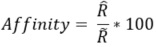

где:
 - доля демографии в аудитории медиа объекта (Reach ц. а. медиа объекта (параметр ц. а. которого задается в фильтре __demo_filter__ и/или параметр географии которого задается  в фильтре __geo_filter__) / Reach Total медиа объекта (параметр total которого задается в фильтре __base_demo_filter__ и/или параметр географии которого задается в фильтре __base_geo_filter__))

 - доля демографии в населении (Universe ц. а. (параметр ц. а. которого задается в фильтре __demo_filter__ и/или параметр географии которого задается  в фильтре __geo_filter__) / Universe (параметр демографии которого задается в фильтре __base_demo_filter__ и/или параметр географии которого задается в фильтре __base_geo_filter__))

### 2) Affinity ADR
Статистика __affinityAdr__ показывает, на сколько соц.-дем. группа представлена в среднедневной аудитории медиа объекта больше / меньше, чем в населении анализируемой географии в целом.
Рассчитывается как соотношение доли демографии в среднедневной аудитории медиа объекта относительно доли этой демографии в населении.

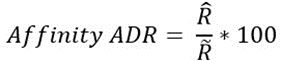

где:
 - доля демографии в среднедневной аудитории медиа объекта (ADR ц. а. медиа объекта (параметр ц. а. которого задается в фильтре __demo_filter__ и/или параметр географии которого задается  в фильтре __geo_filter__) / ADR Total медиа объекта (параметр total которого задается в фильтре __base_demo_filter__ и/или параметр географии которого задается в фильтре __base_geo_filter__))

 - доля демографии в населении (Universe ц. а. (параметр ц. а. которого задается в фильтре __demo_filter__ и/или параметр географии которого задается  в фильтре __geo_filter__) / Universe (параметр демографии которого задается в фильтре __base_demo_filter__ и/или параметр географии которого задается в фильтре __base_geo_filter__))

### 3) Affinity Internet
Статистика __affinityInternet__ показывает, на сколько соц.-дем. группа представлена в аудитории медиа объекта больше / меньше, чем в аудитории интернета по анализируемой географии в целом.
Рассчитывается как соотношение доли демографии в аудитории медиа объекта относительно доли этой демографии в Total Internet.
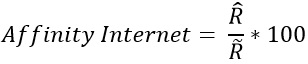

где:
 - доля демографии в аудитории медиа объекта (Reach ц. а. медиа объекта (параметр ц. а. которого задается в фильтре __demo_filter__ и/или параметр географии которого задается  в фильтре __geo_filter__) / Reach Total медиа объекта (параметр total которого задается в фильтре __base_demo_filter__ и/или параметр географии которого задается в фильтре __base_geo_filter__))

 - доля демографии в аудитории интернета (Reach ц. а. Internet (параметр ц. а. которого задается в фильтре __demo_filter__ и/или параметр географии которого задается  в фильтре __geo_filter__) / Reach Total Internet (параметр total которого задается в фильтре __base_demo_filter__ и/или параметр географии которого задается в фильтре __base_geo_filter__))

### 4) 	Affinity ADR Internet
Статистика __affinityAdrInternet__ показывает, на сколько соц.-дем. группа представлена в среднедневной аудитории медиа объекта больше / меньше, чем в среднедневной аудитории интернета по анализируемой географии в целом.
Рассчитывается как соотношение доли демографии в среднедневной аудитории медиа объекта относительно доли этой демографии в среднедневной аудитории Total Internet.
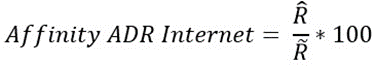

где:
 - доля демографии в среднедневной аудитории медиа объекта (ADR ц. а. медиа объекта (параметр ц. а. которого задается в фильтре __demo_filter__ и/или параметр географии которого задается  в фильтре __geo_filter__) / ADR Total медиа объекта (параметр total которого задается в фильтре __base_demo_filter__ и/или параметр географии которого задается в фильтре __base_geo_filter__))

 - доля демографии в среднедневной аудитории интернета (ADR ц. а. Internet (параметр ц. а. которого задается в фильтре __demo_filter__ и/или параметр географии которого задается  в фильтре __geo_filter__) / ADR Total Internet (параметр total которого задается в фильтре __base_demo_filter__ и/или параметр географии которого задается в фильтре __base_geo_filter__))

### Важно!
- Таким образом, фильтры __geo_filter__ и __demo_filter__ необходимы для ограничения отчета на ц. а., а фильтры __base_geo_filter__ и __base_demo_filter__ - для ограничения на то, относительно чего должны рассчитаться индексы аффинитивности по выбранным ц. а. К примеру, если необходимо рассчитать индекс аффинитивности какой-либо ц. а. относительно генеральной совокупности (жители России 0+ старше 12 лет), то необходимо в фильтре __base_geo_filter__ и __base_demo_filter__ оставить значение __None__. 

- Если расчет происходит по стандартным демографическим переменным, то фильтры __geo_filter__ и __demo_filter__ должны иметь значение __None__ (пример в задании №1).

- Обращаем внимание, что фильтры __base_geo_filter__ и __base_demo_filter__ являются приоритетнее, поэтому для корректного расчета аффинитивности фильтры __base_geo_filter__ и __base_demo_filter__ должны быть шире, чем __geo_filter__ и __demo_filter__. Например, __base_geo_filter__ - "Россиия 100k+", а __geo_filter__ - "Большая Москва". Таким образом будет рассчитан индекс аффинитивности жителей Большой Москвы относительно жителей России 100k+.


# Задания

Перейдем к формированию заданий.


### Задание №1. Расчет индекса аффинитивности по ресурсу Wildberries по стандартной соц-дем переменной "Пол" относительно генеральной совокупности в разбивке на типы пользования Интернетом

In [ ]:
# Задаем название ресурса для отображения в DataFrame
project_name = 'Affinity standard'

# Задаем фильтр по географии, в нашем случае он не требуется
geo_filter = None

# Задаем базовый фильтр по географии, в нашем случае он не требуется
base_geo_filter = None

# Задаем фильтр по демографии, в нашем случае он не требуется
demo_filter = None

# Задаем базовый фильтр по демографии, в нашем случае он не требуется
base_demo_filter = None

# Задаем фильтр по медиа, в нашем случае это ID ресурса Wildberries
mart_filter = 'crossMediaResourceId IN (3768)'

# Указываем список срезов, чтобы сформировать структуру расчета
slices = ["researchMonth", "useTypeName", "crossMediaResourceId", "crossMediaResourceName", "sex"]

# Указываем список статистик для расчета
statistics = ['affinity', 'affinityAdr', 'affinityAdrInternet', 'affinityInternet'] 

# Формируем задание для API Cross Web в формате JSON
task_json = mtask.build_task(
    task_type='media', task_name=project_name, date_filter=date_filter, usetype_filter=usetype_filter, 
    geo_filter=geo_filter, base_geo_filter=base_geo_filter, demo_filter=demo_filter, base_demo_filter=base_demo_filter, 
    mart_filter=mart_filter, slices=slices, statistics=statistics)

# Отправляем задание на расчет и ждем выполнения
task_audience = mtask.wait_task(mtask.send_audience_task(task_json))

# Получаем результат
df_result1 = mtask.result2table(mtask.get_result(task_audience), project_name = project_name)
df_result1

#### Пример интерпретации статистик:

1)  Affinity: `Индекс 113 для группы «мужчины» в Desktop аудитории Wildberries означает, что в декабре 2024 года в Desktop аудитории Wildberries доля мужчин в 1.13 раза больше, чем в населении России старше 12 лет.`


2) Affinity ADR: `Индекс 106 для группы «мужчины» в Desktop аудитории Wildberries означает, что в декабре 2024 года в Desktop аудитории Wildberries доля мужчин в среднедневной аудитории ресурса в 1.06 раза больше, чем в населении России старше 12 лет.`


3)  Affinity Internet: `Индекс 115 для группы «женщины» в Mobile App аудитории Wildberries означает, что в декабре 2024 года в Mobile App аудитории Wildberries доля женщин в 1.15 раза больше, чем в Mobile App аудитории интернета России старше 12 лет.`


3)  Affinity ADR Internet: `Индекс 134 для группы «женщины» в Mobile App аудитории Wildberries означает, что в декабре 2024 года в Mobile App аудитории Wildberries доля женщин в среднедневной аудитории ресурса в 1.34 раза больше, чем в среднедневной Mobile App аудитории интернета России старше 12 лет.`

In [ ]:
# Сохраняем результат в Excel:
writer = pd.ExcelWriter(mtask.get_excel_filename('Affinity_Wildberries'))
df_info = mtask.get_report_info()
df_result1.to_excel(writer, 'Report', index=False)
df_info.to_excel(writer, 'Info', index=False)
writer.save()

### Задание №2. Расчет индекса аффинитивности по ресурсу ВКонтакте по кастомной переменной «жители Южного и/или Северо-Кавказского ФО с семейным положением: женат/ замужем/ гражданский брак» относительно генеральной совокупности

In [ ]:
# Задаем название ресурса для отображения в DataFrame
project_name = 'Affinity geo_demo'

# Задаем фильтр по географии
geo_filter = 'federalOkrug = 3'

# Задаем базовый фильтр по географии, в нашем случае он не требуется
base_geo_filter = None

# Задаем фильтр по демографии
demo_filter = 'familyStatus = 1'

# Задаем базовый фильтр по демографии, в нашем случае он не требуется
base_demo_filter = None

# Задаем фильтр по медиа, в нашем случае это ID ресурса ВКонтакте
mart_filter = 'crossMediaResourceId IN (1150)'

# Указываем список срезов, чтобы сформировать структуру расчета
slices = ["researchMonth", "crossMediaResourceId", "crossMediaResourceName"]

# Указываем список статистик для расчета
statistics = ['affinity', 'affinityAdr', 'affinityAdrInternet', 'affinityInternet'] 

# Формируем задание для API Cross Web в формате JSON
task_json = mtask.build_task(
    task_type='media', task_name=project_name, date_filter=date_filter, usetype_filter=usetype_filter, 
    geo_filter=geo_filter, base_geo_filter=base_geo_filter, demo_filter=demo_filter, base_demo_filter=base_demo_filter, 
    mart_filter=mart_filter, slices=slices, statistics=statistics)

# Отправляем задание на расчет и ждем выполнения
task_audience = mtask.wait_task(mtask.send_audience_task(task_json))

# Получаем результат
df_result2 = mtask.result2table(mtask.get_result(task_audience), project_name = project_name)
df_result2

#### Пример интерпретации статистик:

1)  Affinity: `Индекс 91 для группы «жители Южного и/или Северо-Кавказского ФО с семейным положением: женат/ замужем/ гражданский брак» в десктопной и/или мобильной аудитории ВКонтакте означает, что в декабре 2024 года в десктопной и/или мобильной аудитории ВКонтакте доля анализируемой группы в 0.91 раза меньше, чем в населении России старше 12 лет.`


2) Affinity ADR: `Индекс 73 для группы «жители Южного и/или Северо-Кавказского ФО с семейным положением: женат/ замужем/ гражданский брак» в десктопной и/или мобильной аудитории ВКонтакте означает, что в декабре 2024 года в десктопной и/или мобильной аудитории ВКонтакте доля анализируемой группы в среднедневной аудитории ресурса в 0.73 раза меньше, чем в населении России старше 12 лет.`


3)  Affinity Internet: `Индекс 92 для группы «жители Южного и/или Северо-Кавказского ФО с семейным положением: женат/ замужем/ гражданский брак» в десктопной и/или мобильной аудитории ВКонтакте означает, что в декабре 2024 года в десктопной и/или мобильной аудитории ВКонтакте доля анализируемой группы в 0.92 раза меньше, чем в десктопной и/или мобильной аудитории интернета России старше 12 лет.`


3)  Affinity ADR Internet: `Индекс 73 для группы «жители Южного и/или Северо-Кавказского ФО с семейным положением: женат/ замужем/ гражданский брак» в десктопной и/или мобильной аудитории ВКонтакте означает, что в декабре 2024 года в десктопной и/или мобильной аудитории ВКонтакте доля анализируемой группы в среднедневной аудитории ресурса в 0.73 раза меньше, чем в десктопной и/или мобильной среднедневной аудитории интернета России старше 12 лет.`

In [ ]:
# Сохраняем результат в Excel:
writer = pd.ExcelWriter(mtask.get_excel_filename('Affinity ВКонтакте'))
df_info = mtask.get_report_info()
df_result2.to_excel(writer, 'Report', index=False)
df_info.to_excel(writer, 'Info', index=False)
writer.save()

### Задание №3. Расчет индекса аффинитивности по ресурсам Wildberries и Ozon по кастомной переменной «жители Большой Москвы старше 25 лет с уровнем дохода BC» относительно жителей России 100k+ старше 12 лет.

In [ ]:
# Задаем название ресурса для отображения в DataFrame
project_name = 'Affinity geo_demo base'

# Задаем фильтр по географии
geo_filter = 'cityPop = 1'

# Задаем базовый фильтр по географии
base_geo_filter = 'cityPop100 = 1'

# Задаем фильтр по демографии
demo_filter = 'age >= 25 AND incomeGroup IN (3,4,5)'

# Задаем базовый фильтр по демографии, в нашем случае он не требуется
base_demo_filter = None

# Задаем фильтр по медиа, в нашем случае это ID ресурсов Wildberries и Ozon
mart_filter = 'crossMediaResourceId IN (1094, 3768)'

# Указываем список срезов, чтобы сформировать структуру расчета
slices = ["researchMonth"]

# Указываем список статистик для расчета
statistics = ['affinity', 'affinityAdr', 'affinityAdrInternet', 'affinityInternet'] 

# Формируем задание для API Cross Web в формате JSON
task_json = mtask.build_task(
    task_type='media', task_name=project_name, date_filter=date_filter, usetype_filter=usetype_filter, 
    geo_filter=geo_filter, base_geo_filter=base_geo_filter, demo_filter=demo_filter, base_demo_filter=base_demo_filter, 
    mart_filter=mart_filter, slices=slices, statistics=statistics)

# Отправляем задание на расчет и ждем выполнения
task_audience = mtask.wait_task(mtask.send_audience_task(task_json))

# Получаем результат
df_result3 = mtask.result2table(mtask.get_result(task_audience), project_name = project_name)
df_result3

#### Пример интерпретации статистик:

1)  Affinity: `Индекс 103 для группы «жители Большой Москвы старше 25 лет с уровнем дохода BC» в десктопной и/или мобильной аудитории Ozon и/или Wildberries означает, что в декабре 2024 года в десктопной и/или мобильной аудитории Ozon и/или Wildberries доля анализируемой группы в 1.03 раза больше, чем в населении России 100k+ старше 12 лет.`


2) Affinity ADR: `Индекс 102 для группы «жители Большой Москвы старше 25 лет с уровнем дохода BC» в десктопной и/или мобильной аудитории Ozon и/или Wildberries означает, что в декабре 2024 года в десктопной и/или мобильной аудитории Ozon и/или Wildberries доля анализируемой группы в среднедневной аудитории ресурса в 1.02 раза больше, чем в населении России 100k+ старше 12 лет.`


3)  Affinity Internet: `Индекс 100 для группы «жители Большой Москвы старше 25 лет с уровнем дохода BC» в десктопной и/или мобильной аудитории Ozon и/или Wildberries означает, что в декабре 2024 года в десктопной и/или мобильной аудитории Ozon и/или Wildberries доля анализируемой группы соответствует доле этой группы в десктопной и/или мобильной аудитории интернета России 100k+ старше 12 лет.`


3)  Affinity ADR Internet: `Индекс 99 для группы «жители Большой Москвы старше 25 лет с уровнем дохода BC» в десктопной и/или мобильной аудитории Ozon и/или Wildberries означает, что в декабре 2024 года в десктопной и/или мобильной аудитории Ozon и/или Wildberries доля анализируемой группы в среднедневной аудитории ресурса в 0.99 раза меньше, чем в десктопной и/или мобильной среднедневной аудитории интернета России 100k+ старше 12 лет.`

In [ ]:
# Сохраняем результат в Excel:
writer = pd.ExcelWriter(mtask.get_excel_filename('Affinity Wildberries&Ozon'))
df_info = mtask.get_report_info()
df_result3.to_excel(writer, 'Report', index=False)
df_info.to_excel(writer, 'Info', index=False)
writer.save()

### Задание №4. Расчет индекса аффинитивности по ресурсу Ozon по кастомной переменной «жители Большой Москвы старше 25 лет с уровнем дохода BC» относительно жителей России 100k+ старше 25 лет

In [ ]:
# Задаем название ресурса для отображения в DataFrame
project_name = 'Affinity geo_demo base'

# Задаем фильтр по географии
geo_filter = 'cityPop = 1'

# Задаем базовый фильтр по географии
base_geo_filter = 'cityPop100 = 1'

# Задаем фильтр по демографии
demo_filter = 'age >= 25 AND incomeGroup IN (3,4,5)'

# Задаем базовый фильтр по демографии
base_demo_filter = 'age >= 25'

# Задаем фильтр по медиа, в нашем случае это ID ресурса Ozon
mart_filter = 'crossMediaResourceId IN (1094)'

# Указываем список срезов, чтобы сформировать структуру расчета
slices = ["researchMonth", "crossMediaResourceId", "crossMediaResourceName"]

# Указываем список статистик для расчета
statistics = ['affinity', 'affinityAdr', 'affinityAdrInternet', 'affinityInternet'] 

# Формируем задание для API Cross Web в формате JSON
task_json = mtask.build_task(
    task_type='media', task_name=project_name, date_filter=date_filter, usetype_filter=usetype_filter, 
    geo_filter=geo_filter, base_geo_filter=base_geo_filter, demo_filter=demo_filter, base_demo_filter=base_demo_filter, 
    mart_filter=mart_filter, slices=slices, statistics=statistics)

# Отправляем задание на расчет и ждем выполнения
task_audience = mtask.wait_task(mtask.send_audience_task(task_json))

# Получаем результат
df_result4 = mtask.result2table(mtask.get_result(task_audience), project_name = project_name)
df_result4

#### Пример интерпретации статистик:

1)  Affinity: `Индекс 108 для группы «жители Большой Москвы старше 25 лет с уровнем дохода BC» в десктопной и/или мобильной аудитории Ozon означает, что в декабре 2024 года в десктопной и/или мобильной аудитории Ozon доля анализируемой группы в 1.08 раза больше, чем в населении России 100k+ старше 25 лет.`


2) Affinity ADR: `Индекс 108 для группы «жители Большой Москвы старше 25 лет с уровнем дохода BC» в десктопной и/или мобильной аудитории Ozon означает, что в декабре 2024 года в десктопной и/или мобильной аудитории Ozon доля анализируемой группы в среднедневной аудитории ресурса в 1.08 раза больше, чем в населении России 100k+ старше 25 лет.`


3)  Affinity Internet: `Индекс 103 для группы «жители Большой Москвы старше 25 лет с уровнем дохода BC» в десктопной и/или мобильной аудитории Ozon означает, что в декабре 2024 года в десктопной и/или мобильной аудитории Ozon доля анализируемой группы в 1.03 раза больше, чем в десктопной и/или мобильной аудитории интернета России 100k+ старше 25 лет.`


3)  Affinity ADR Internet: `Индекс 103 для группы «жители Большой Москвы старше 25 лет с уровнем дохода BC» в десктопной и/или мобильной аудитории Ozon означает, что в декабре 2024 года в десктопной и/или мобильной аудитории Ozon доля анализируемой группы в среднедневной аудитории ресурса в 1.03 раза больше, чем в десктопной и/или мобильной среднедневной аудитории интернета России 100k+ старше 25 лет.`

In [ ]:
# Сохраняем результат в Excel:
writer = pd.ExcelWriter(mtask.get_excel_filename('Affinity Ozon'))
df_info = mtask.get_report_info()
df_result4.to_excel(writer, 'Report', index=False)
df_info.to_excel(writer, 'Info', index=False)
writer.save()